<h1>Forecasting number of Air Passengers for next 10 years</h1>

- Importing all the required libraries for analysis

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [163]:
data=pd.read_csv("/content/AirPassengers.csv")
data.shape

(144, 2)

- Creating the 'Date' as Index for data and viewing the dataset

In [164]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
print(data.head())
print(data.tail())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
            #Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432


- Visualizing the Time Series plot for the number of Air Passengers 

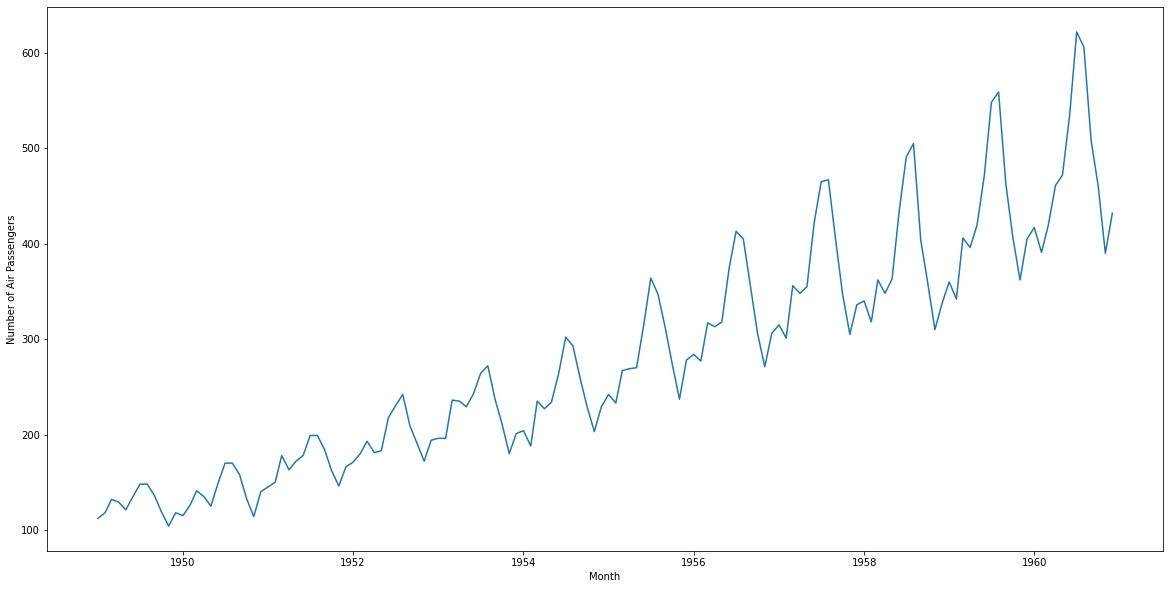

In [165]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

Observations:


*   Trend: The values of the data are increased in a reasonably predictable pattern. 
*   Seasonal: The patterns of the data are repeated over a period of 12 months

*   Cyclical: The values of the data exhibit random rises and falls that are not of a fixed frequency.






- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [166]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


- Plotting the Rolling Mean and Standard Deviation
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

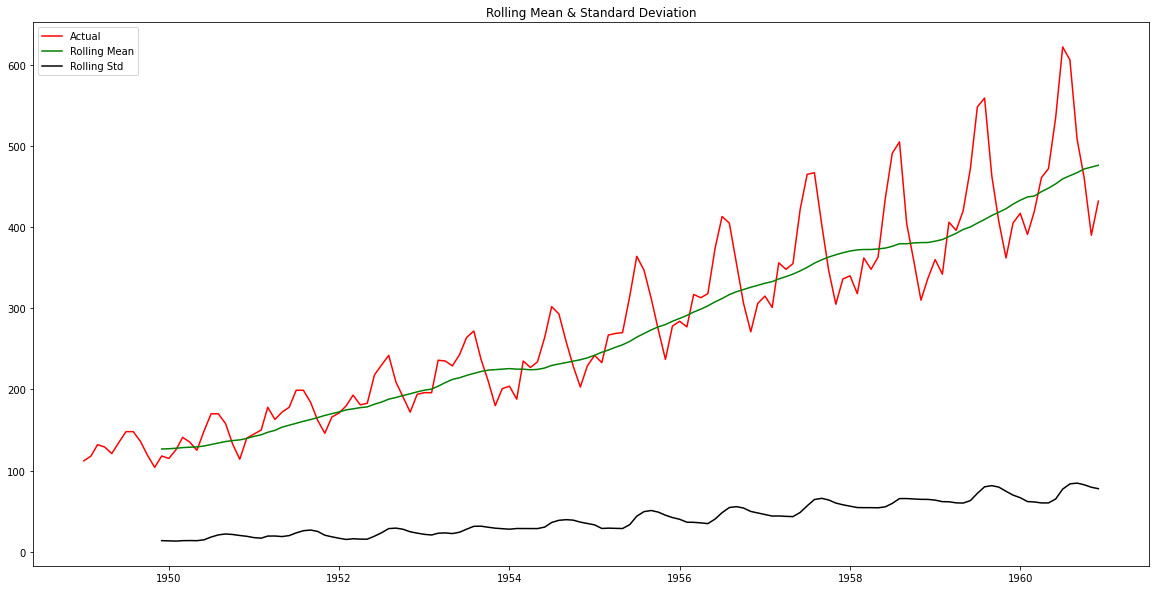

In [167]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [168]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [169]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- TRANSFORMATION 1:

  Log transformation

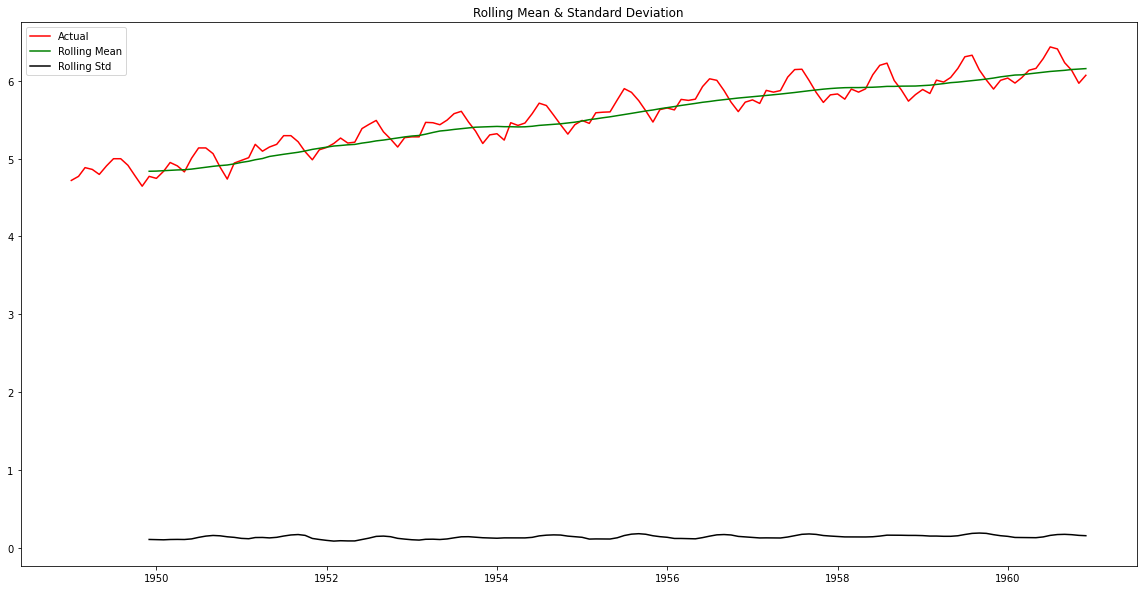

Dickey-Fuller Test: 
Test Statistic           -1.717017
p-value                   0.422367
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [170]:
data_log=np.log(data)

MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()

stationarity(data_log)

- TRANSFORMATION 2:

  Subtracting simple moving average

In [171]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


- Output of differencing method, after dropping null values

In [172]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

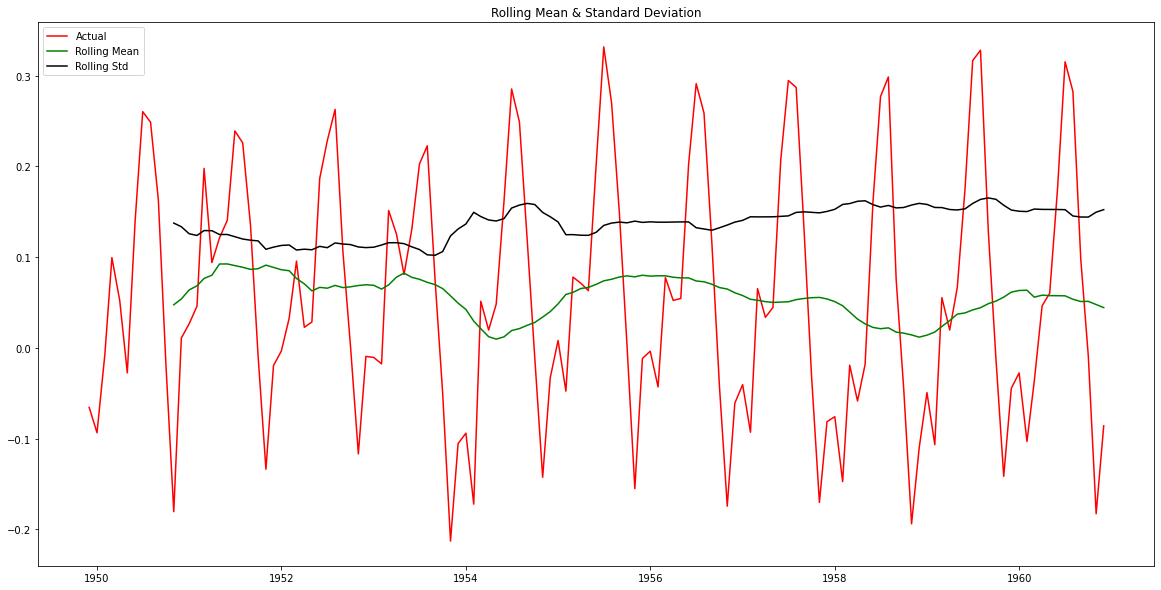

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [173]:
stationarity(data_log_diff)

- TRANSFORMATION 3:

  Subtracting expotential moving averages

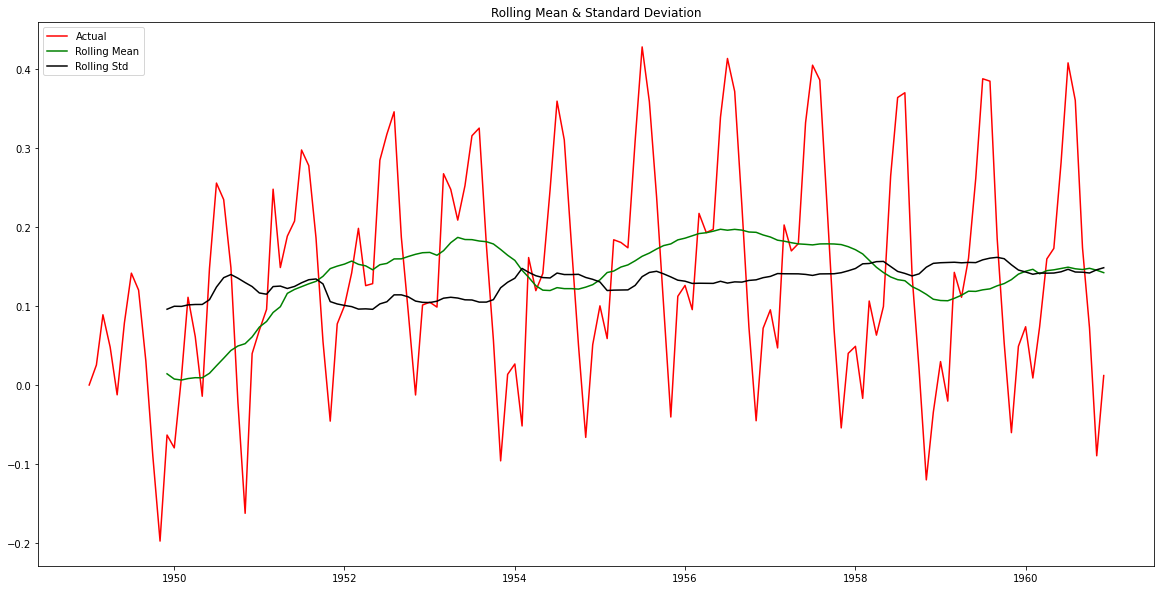

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [174]:
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- TRANSFORMATION 4:

  Subtracting from previous value (shift)

In [175]:
data_shift=data_log-data_log.shift()
data_shift.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


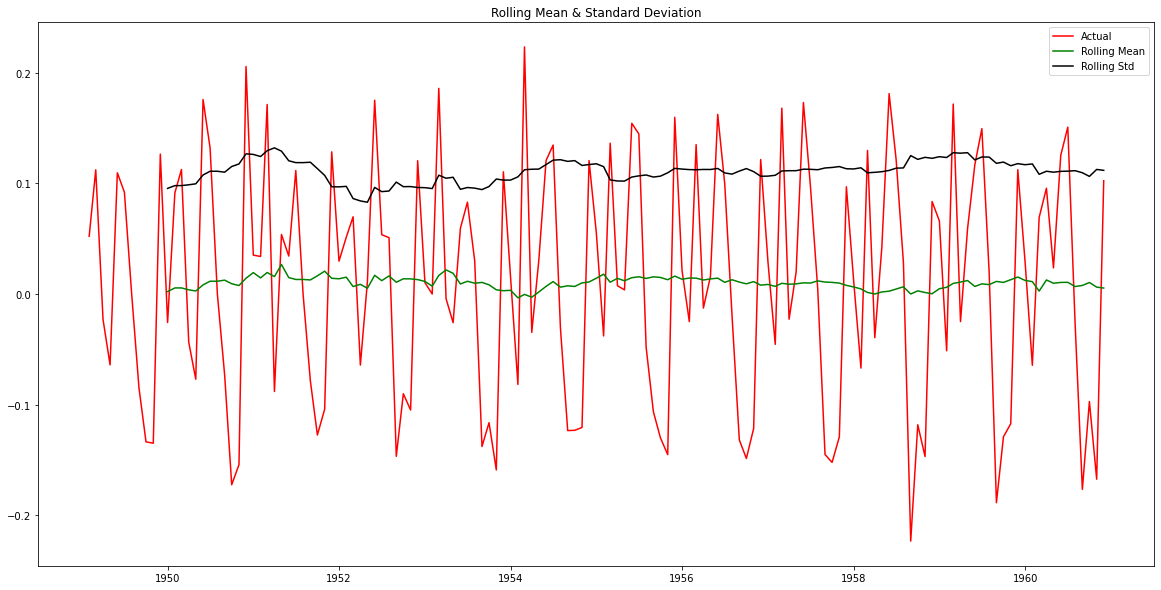

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [176]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- MODEL 1:

  AutoRegressive Model (AR)

plotting AR model


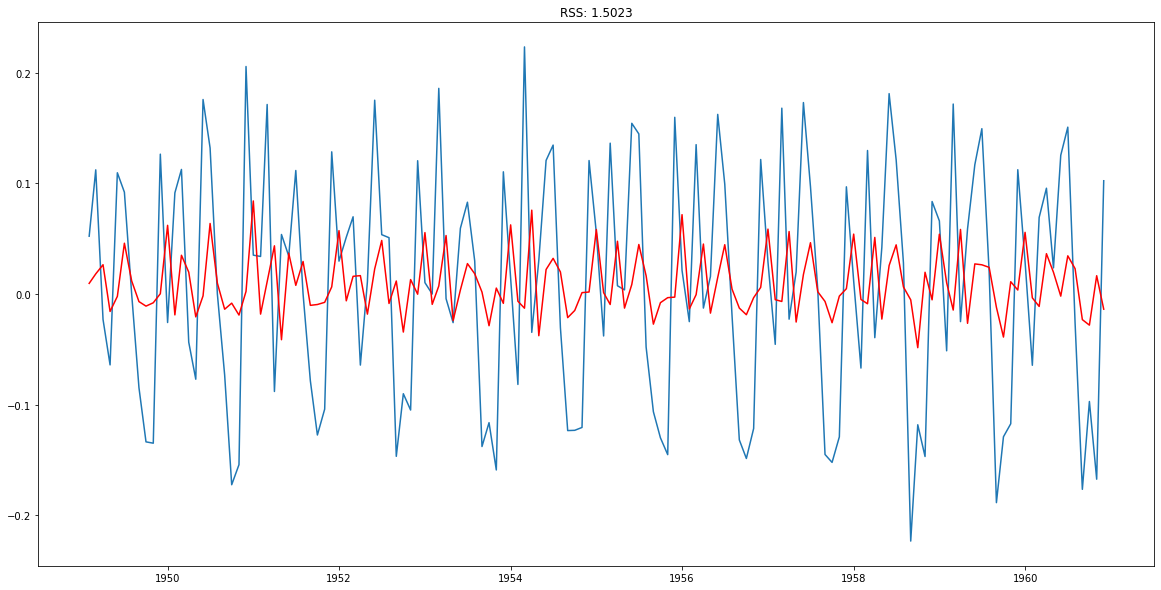

In [177]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,0))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['#Passengers'])**2))
print('plotting AR model')

- MODEL 2:

  Moving Average Model (MR)

plotting MR model


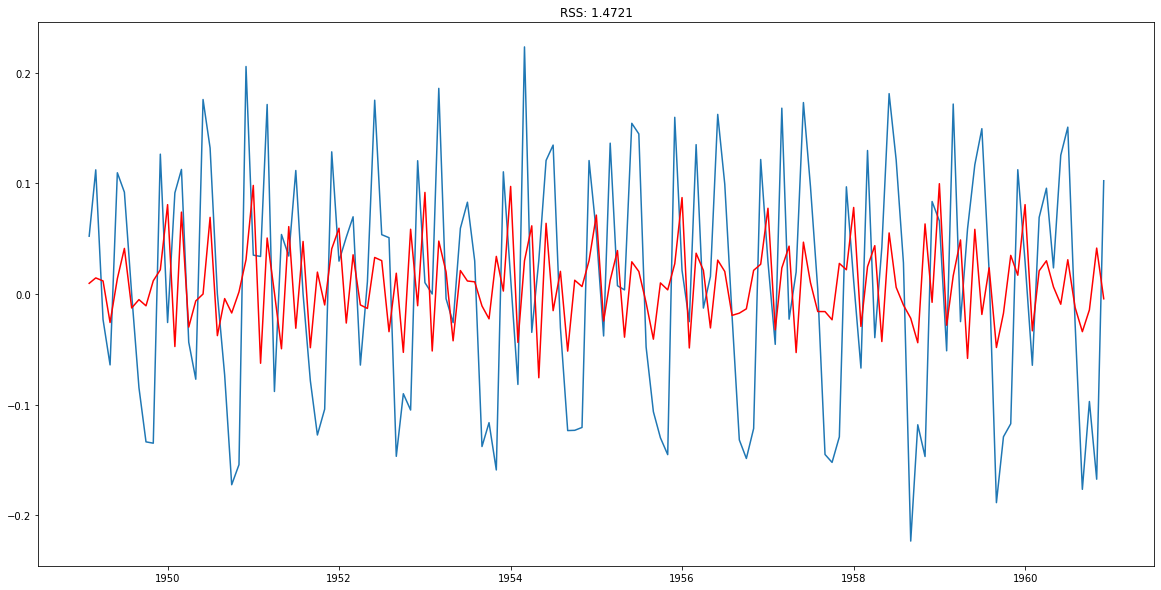

In [178]:
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(0,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['#Passengers'])**2))
print('plotting MR model')

- MODEL 3:

  Auto Regressive Integrated Moving Average Model (ARIMA)

plotting ARIMA model


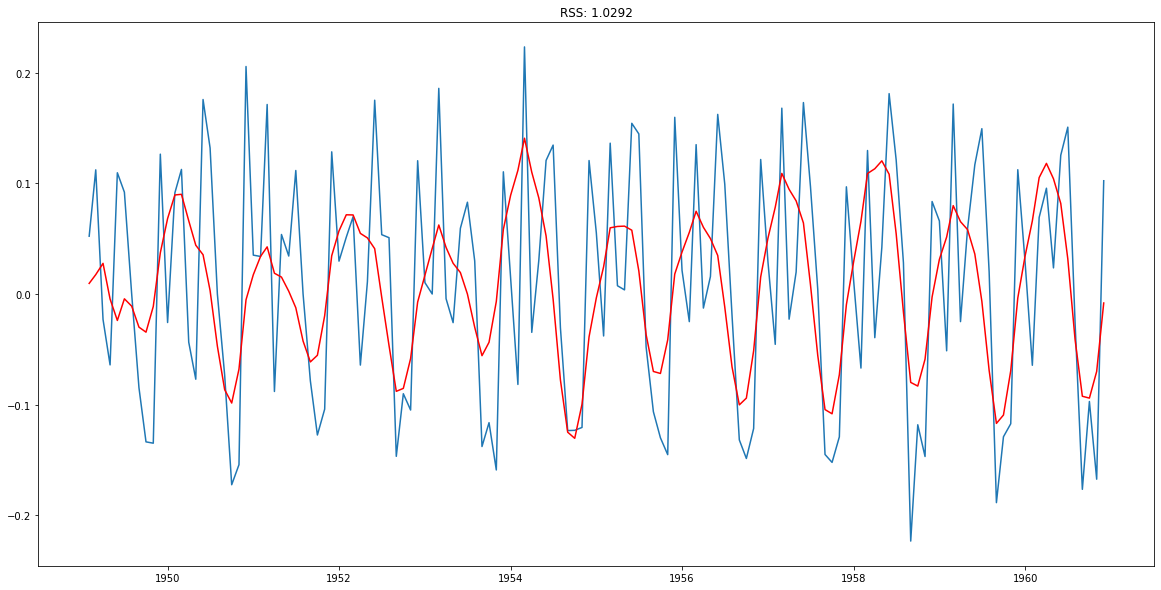

In [179]:
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['#Passengers'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [180]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [181]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


- Below is data display of predicted value in log scale

In [182]:
predictions_log=pd.Series(data_log['#Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

In [183]:
predictions_ARIMA=np.exp(predictions_log)
predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073418
1949-04-01    118.301999
1949-05-01    117.768376
dtype: float64

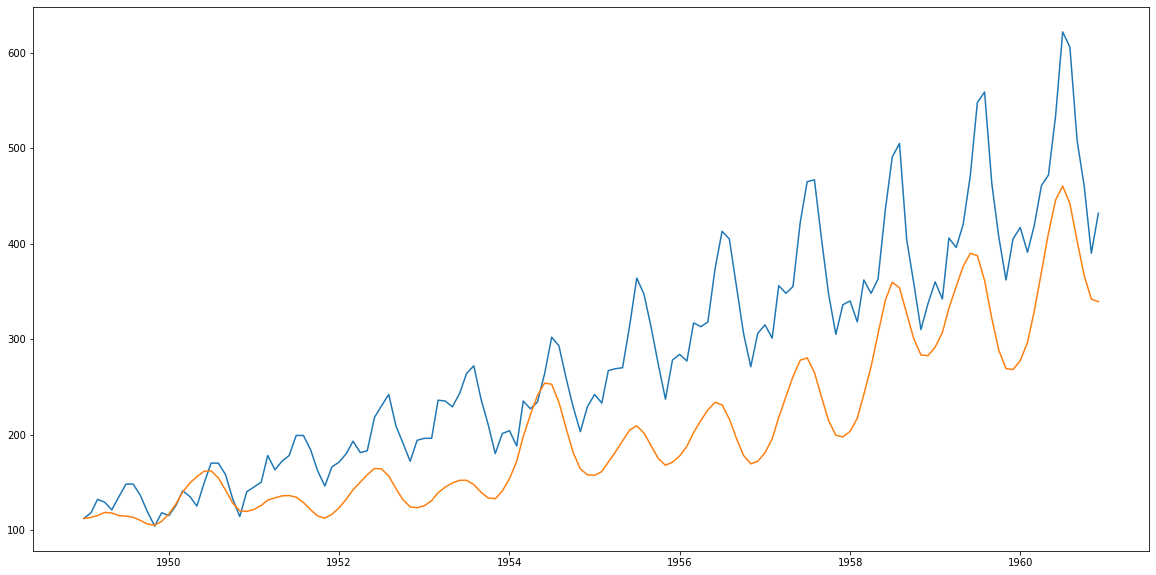

In [184]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

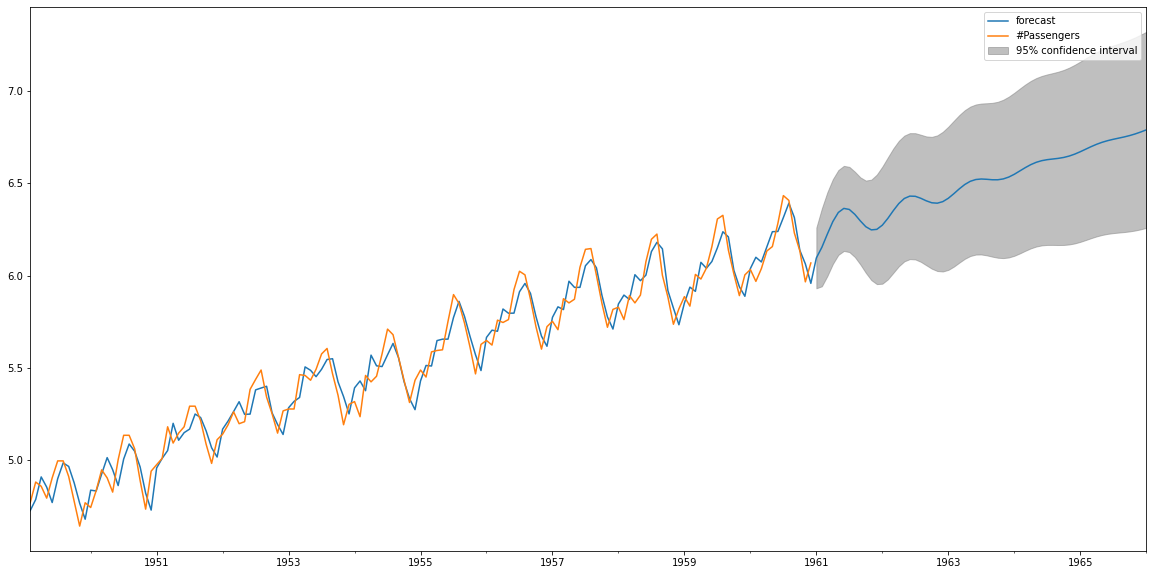

In [185]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [186]:
x[0]

array([6.09553393, 6.15281404, 6.22442968, 6.29241104, 6.34164719,
       6.36359363, 6.35784685, 6.33139301, 6.29597534, 6.26447705,
       6.24738316, 6.25025162, 6.27275829, 6.30940308, 6.35151493,
       6.38988658, 6.41727385, 6.43011056, 6.42906688, 6.41842484,
       6.40456145, 6.39403603, 6.39183069, 6.40019491, 6.41833682,
       6.44295402, 6.46937433, 6.49293986, 6.5102412 , 6.51989033,
       6.52267575, 6.52112379, 6.51864515, 6.51853676, 6.52311908,
       6.53322348, 6.54812859, 6.5659155 , 6.58410304, 6.60036537,
       6.61313263, 6.62192776, 6.62737781, 6.63093118, 6.63438676,
       6.63937971, 6.64696491, 6.65739828, 6.67015314, 6.68414243,
       6.69806619, 6.71077895, 6.72157725, 6.73033975, 6.737498  ,
       6.74386366, 6.75037309, 6.75782578, 6.76668668, 6.7769981 ,
       6.78841307, 6.80032843, 6.81207185, 6.8230875 , 6.83307126,
       6.84202481, 6.85022299, 6.85811207, 6.86617325, 6.87479136,
       6.88416288, 6.8942637 , 6.90487876, 6.91567925, 6.92632

- Actual predicted value for next 10 years, after taking out log transformation

In [187]:
np.exp(x[0])

array([ 443.87097762,  470.03823501,  504.93498569,  540.45481777,
        567.73070253,  580.32810024,  577.00264583,  561.93883398,
        542.38459619,  525.56666809,  516.65903841,  518.14318426,
        529.93708333,  549.7167152 ,  573.36065281,  595.78900036,
        612.33152682,  620.24251948,  619.595523  ,  613.03671995,
        604.59659725,  598.26633402,  596.9484067 ,  601.96235197,
        612.98276821,  628.25995268,  645.07999634,  660.46218065,
        671.98848064,  678.50396733,  680.39652042,  679.34139492,
        677.65963726,  677.58618636,  680.69823222,  687.61114041,
        697.93682796,  710.46202964,  723.50180732,  735.36381945,
        744.81259229,  751.39220757,  755.49851153,  758.18785343,
        760.81236274,  764.62055692,  770.44240752,  778.52280219,
        788.51634945,  799.62464692,  810.83630819,  821.21006952,
        830.1257967 ,  837.43173856,  843.44779004,  848.83401572,
        854.37746318,  860.76866061,  868.42973499,  877.43080